## Predictive Analytics 
## Milestone 3
## Anna Jazayeri 131661209

# Importing and Cleaning data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

In [2]:
House_price = pd.read_csv('train.csv')
House_price.shape

(1460, 81)

In [3]:
House_price.drop('Id' , axis = 1 , inplace = True)
House_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
House_price.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
House_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Missing values

In [6]:
pd.set_option('display.max_rows', None)  # display all rows
pd.set_option('display.max_columns', None)  # display all columns

missing_values = House_price.isnull().sum()
print(missing_values)

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

#### Result: In this dataset there are 1460 rows, based on the result of missing values, some columns have a lot of missing values, so I will drop these columns. For other columns which have a few missing values I will use fill na methods to fill these missing values with mean and mode. mean for numeric columns and mode for nun-numeric columns.

In [7]:
threshold = 0.75  # Set your threshold for missing values, e.g., 50%

# Calculate the threshold count
missing_threshold = len(House_price) * threshold

# Drop columns with missing values surpassing the threshold
House_price = House_price.dropna(axis=1, thresh=missing_threshold)

# Replace missing values in specific columns with their mean
columns_to_fill_mean = ['LotFrontage', 'GarageYrBlt', 'GarageCars', 'GarageArea']
columns_to_fill_mode = ['BsmtQual', 'MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Fill missing values with mean
House_price.loc[:, columns_to_fill_mean] = House_price.loc[:, columns_to_fill_mean].fillna(House_price.loc[:, columns_to_fill_mean].mean())

# Fill missing values with mode
mode_values = House_price.loc[:, columns_to_fill_mode].mode().iloc[0]
House_price.loc[:, columns_to_fill_mode] = House_price.loc[:, columns_to_fill_mode].fillna(mode_values)


In [8]:
missing_values = House_price.isnull().sum().sum()
print (f'Total missing value in all dataframe is {missing_values}')

Total missing value in all dataframe is 0


### Outliers

In [9]:
numeric_columns = House_price.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:", numeric_columns)


Numeric columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [10]:
cat_columns = House_price.select_dtypes(exclude='number').columns.tolist()
print("Categorical columns:", cat_columns)

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [11]:
House_price_num = House_price.select_dtypes(include = ['float64', 'int64'])
House_price_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [12]:
# Using Z-score to identify potential outliers
from scipy import stats

z_scores = np.abs(stats.zscore(House_price[numeric_columns]))
threshold = 3  # Define your threshold for Z-score
outliers = np.where(z_scores > threshold)

# Remove rows with outliers from the DataFrame
House_price2 = House_price[(z_scores <= threshold).all(axis=1)]

# Compare the shapes to see how many rows were removed
print("Original shape:", House_price.shape)
print("Shape after removing outliers:", House_price2.shape)

Original shape: (1460, 74)
Shape after removing outliers: (1015, 74)


### Numerical data distribution

#### Frequency Distribution for SalePrice

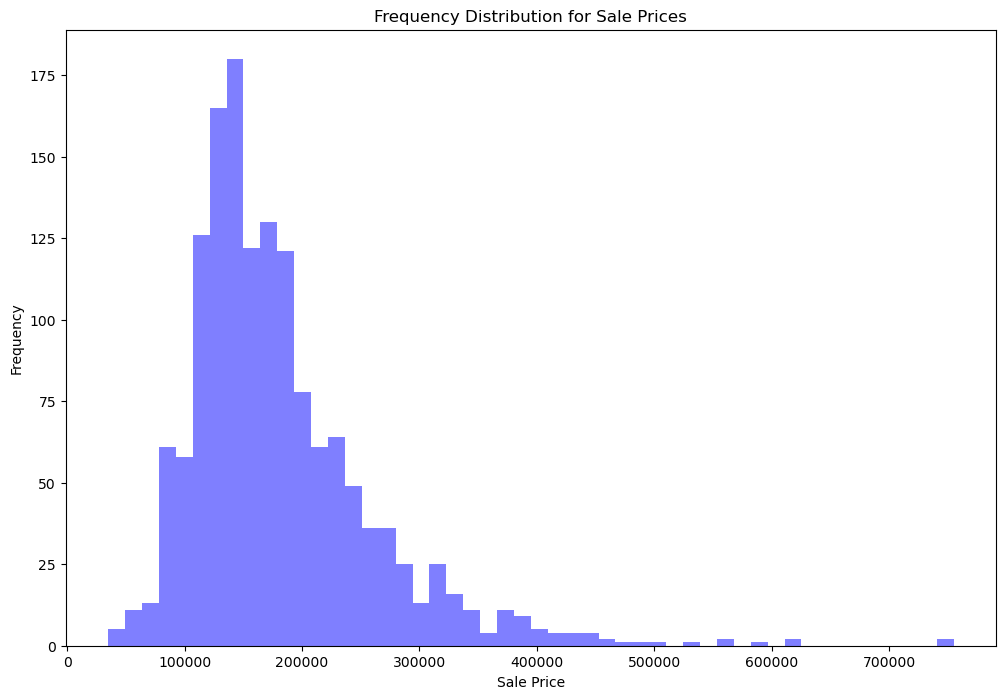

In [13]:
plt.figure(figsize=(12, 8))
plt.hist(House_price['SalePrice'], bins=50, color='blue', alpha=0.5)
plt.title('Frequency Distribution for Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


### Histogram Numerical data distribution columns

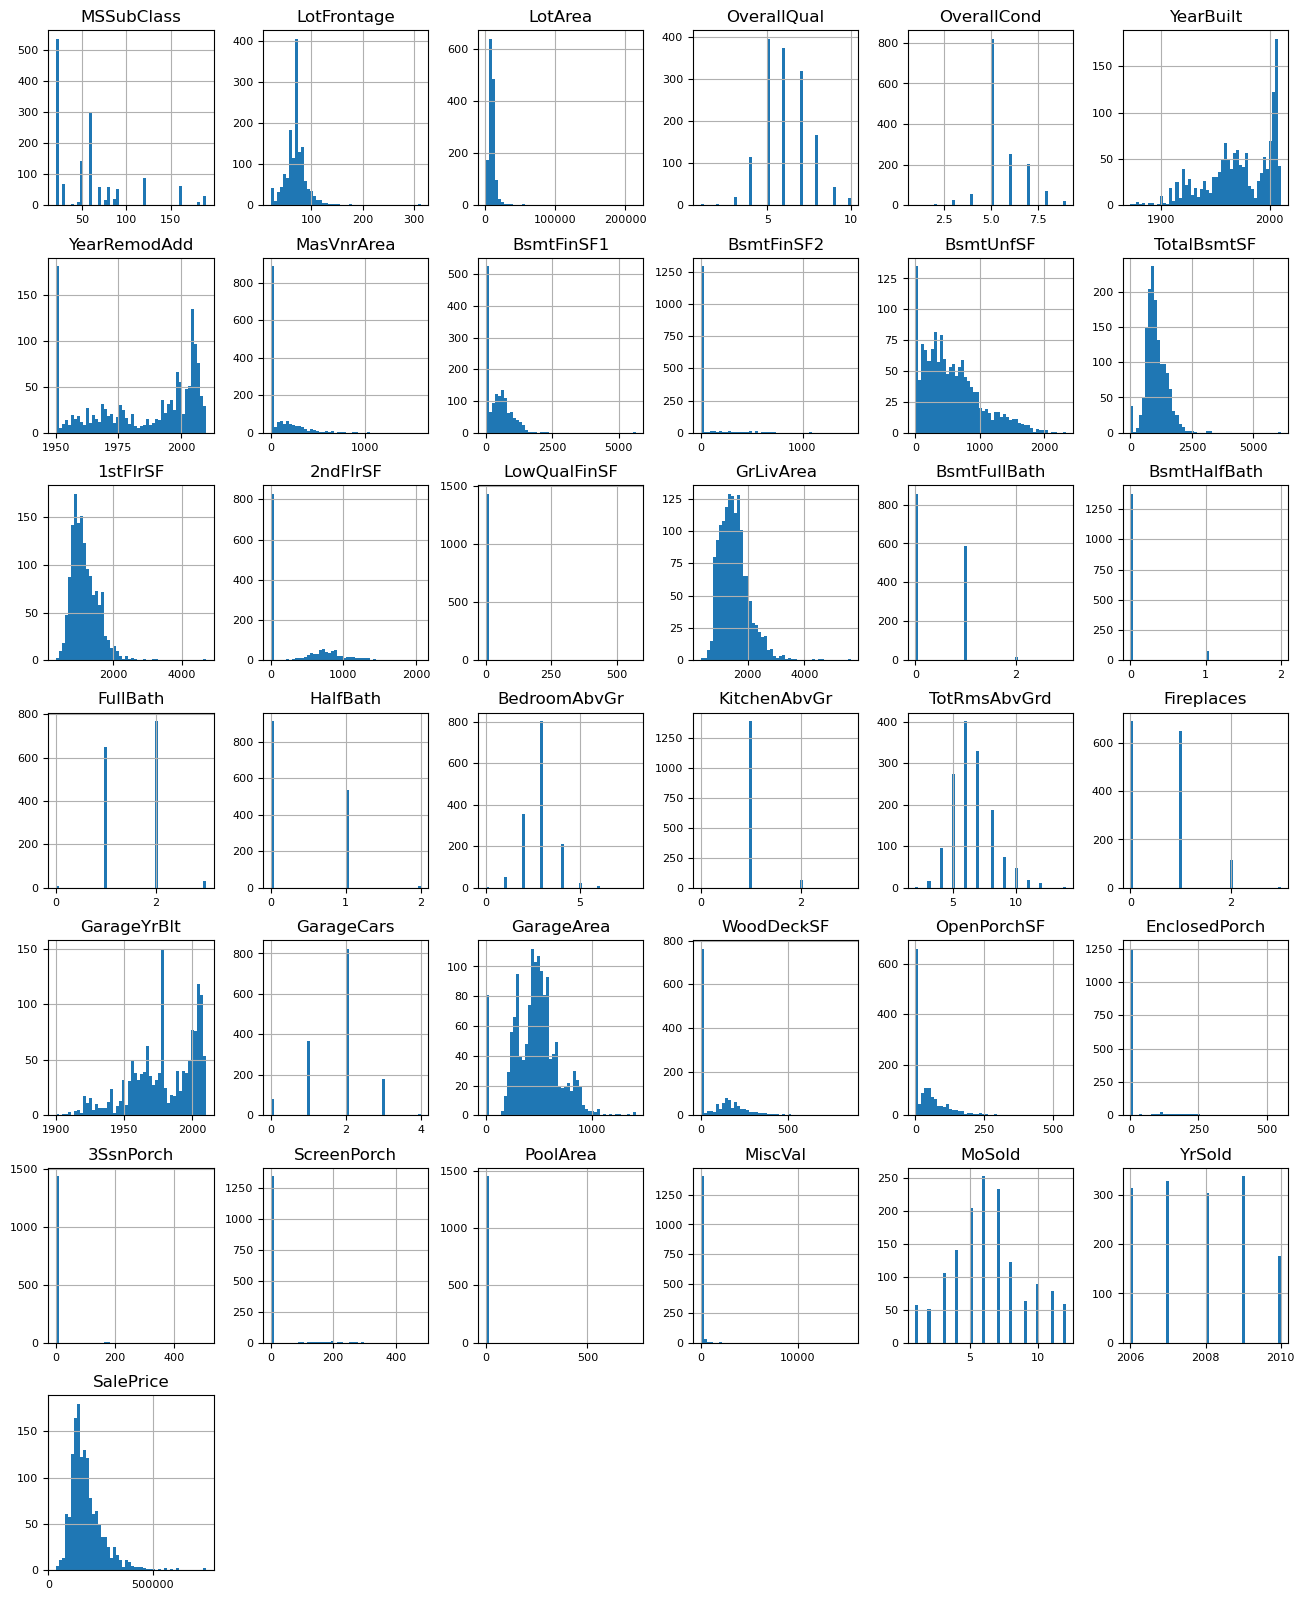

In [14]:
# Create histograms for numerical columns
House_price_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# Display the histograms
plt.show()

### Heat map

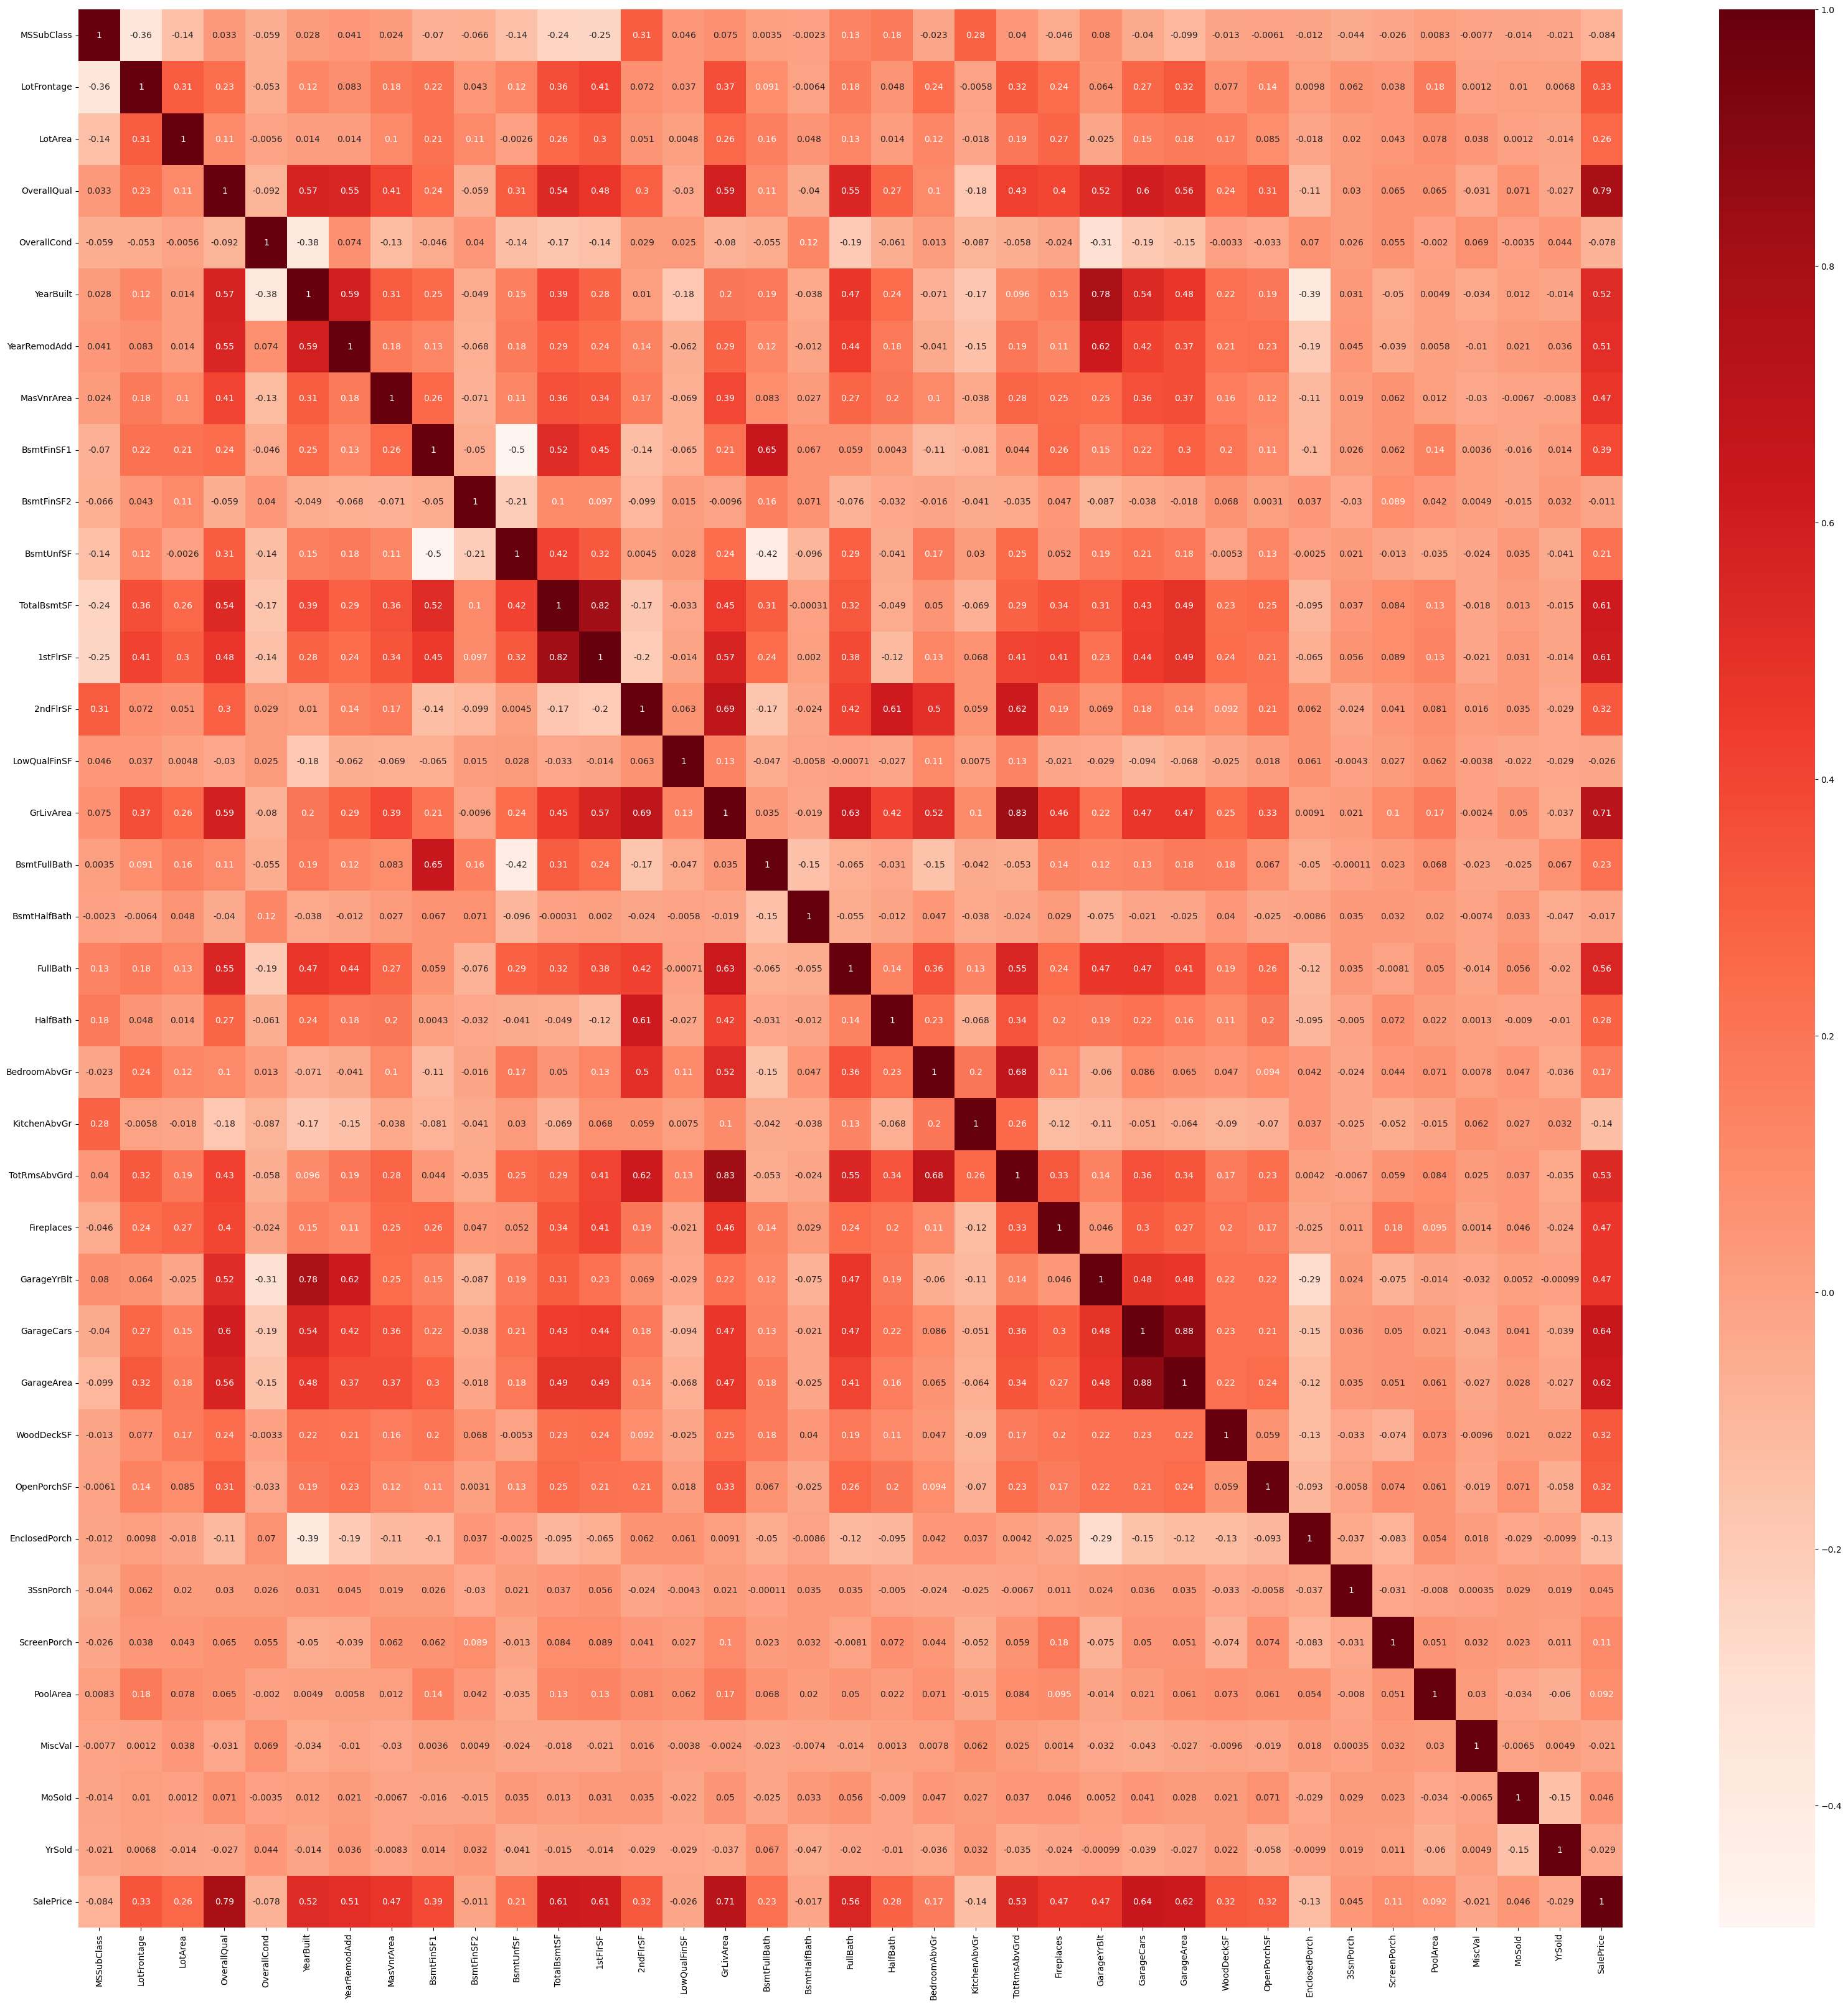

In [15]:
# Calculate correlation
cor = House_price_num.corr()

# Plot the correlation matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
# getting the high correlated columns with sale price
high_corr_columns = cor['SalePrice'][
    (cor['SalePrice'].abs() > 0.49) & (cor['SalePrice'] != 1)
]

# Display highly correlated columns and their correlation values
print("Highly correlated columns and their correlation values with SalePrice:")
print(high_corr_columns)


Highly correlated columns and their correlation values with SalePrice:
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64


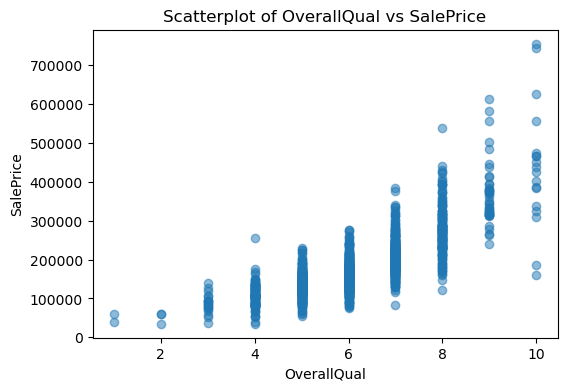

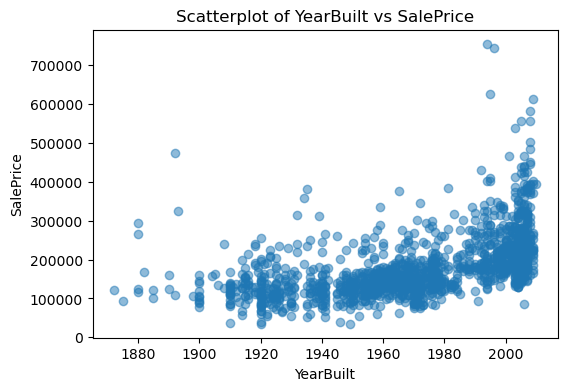

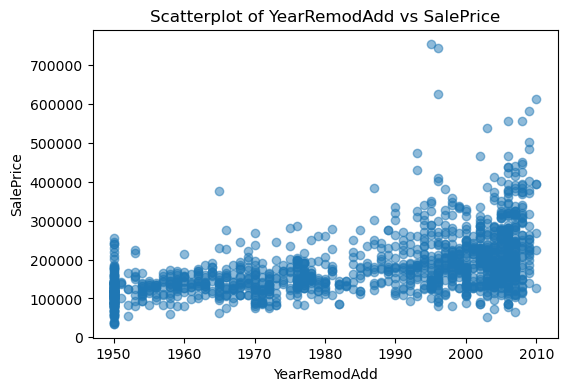

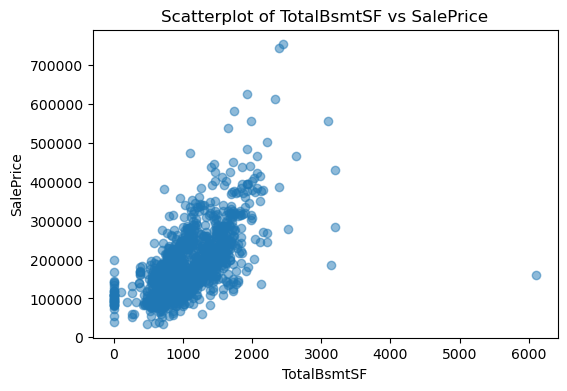

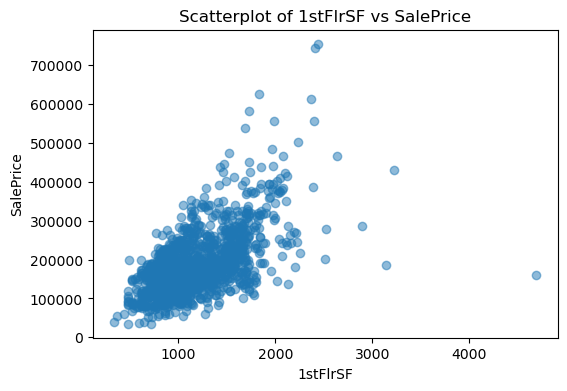

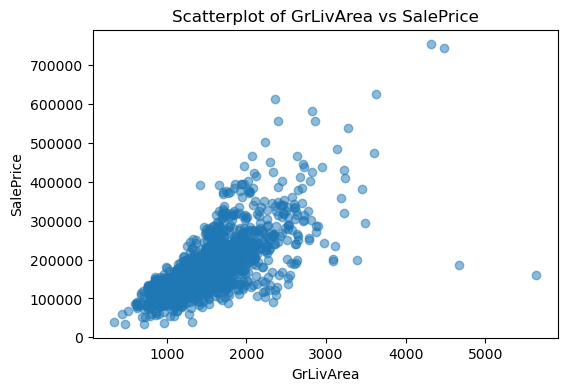

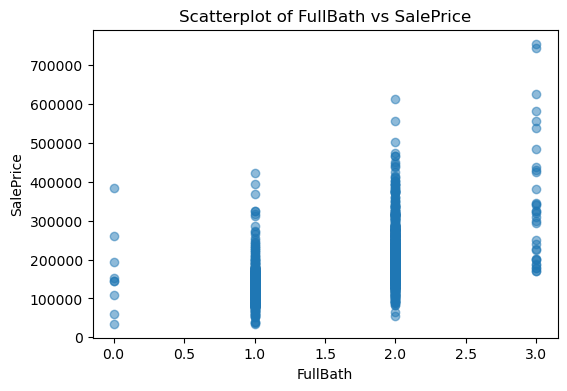

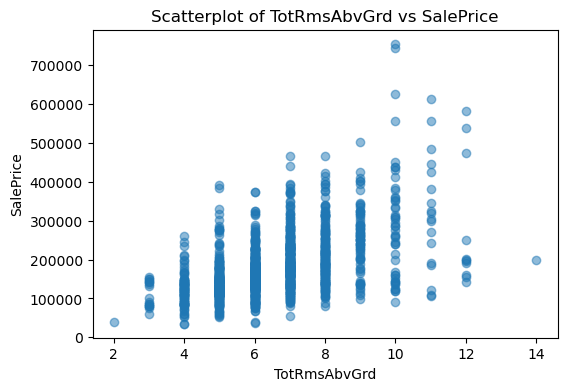

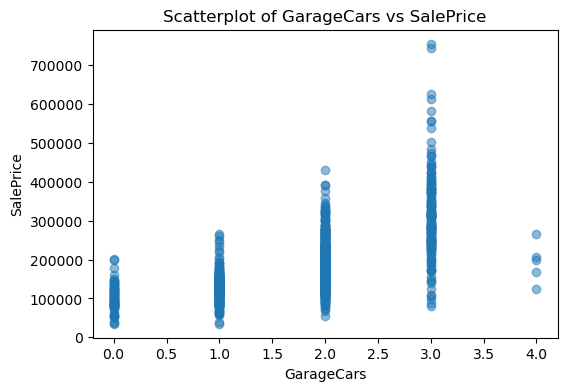

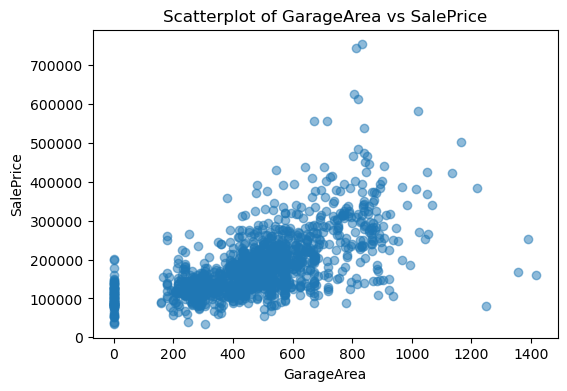

In [17]:
high_corr_columns_names = high_corr_columns.index.tolist()

# Plot scatterplots for each highly correlated column with SalePrice
for column in high_corr_columns_names:
    plt.figure(figsize=(6, 4))
    plt.scatter(House_price[column], House_price['SalePrice'], alpha=0.5)
    plt.title(f'Scatterplot of {column} vs SalePrice')
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()


# Using Predictive Analytics Models

In [20]:
# from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
            'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
target = 'SalePrice'

X = House_price[features]
y = House_price[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Linear Regression with evaluation 

In [22]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 37253.021767610466
R-squared: 0.8011222436439072
